In [3]:
!pip install numpy pandas opencv-python seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import os, shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


In [5]:
# Dataset Preprocessing
import zipfile
z = zipfile.ZipFile('./archive.zip')
z.extractall()

In [6]:
folder = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training"
count = 0

for subfolder in os.listdir(folder):
    if subfolder != 'notumor':   # skip 'notumor'
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            source = os.path.join(subfolder_path, image)
            destination = os.path.join(subfolder_path, f"Y_{count}.jpg")
            
            os.rename(source, destination)
            count += 1

print("Renaming carried out successfully")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\SHAURYA\\Desktop\\Brain-Tumor-Classification\\Training\\glioma\\Tr-glTr_0000.jpg' -> 'C:\\Users\\SHAURYA\\Desktop\\Brain-Tumor-Classification\\Training\\glioma\\Y_0.jpg'

In [ ]:
folder = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training"
count = 0

for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            source = os.path.join(subfolder_path, image)
            destination = os.path.join(subfolder_path, f"N_{count}.jpg")
            
            os.rename(source, destination)
            count += 1

print("Renaming carried out successfully")

In [ ]:
# Completed Data Preprocessing Starting EDA(Exploratory Data Analysis)

In [10]:
folder = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training"
count_tumor = 0
count_notumor = 0
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)


8234
3190


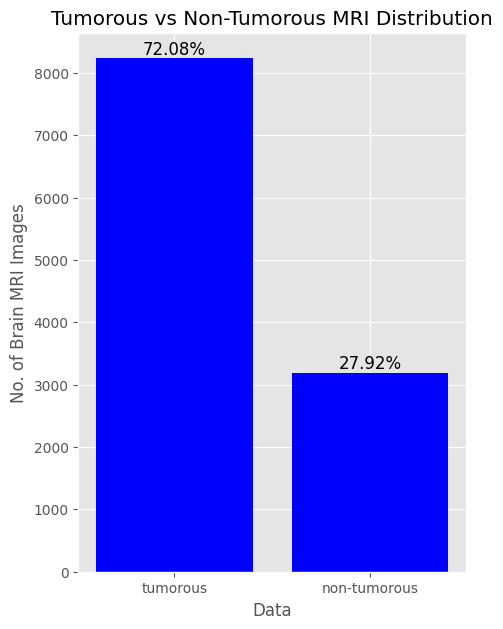

In [11]:
data = {"tumorous": count_tumor, "non-tumorous": count_notumor}
typex = list(data.keys())
values = list(data.values())

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

fig = plt.figure(figsize=(5,7))
bars = plt.bar(typex, values, color="blue")

# Add percentage text above bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%', ha='center', va='bottom', fontsize=12, color="black")

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Tumorous vs Non-Tumorous MRI Distribution")
plt.show()


In [12]:
!pip install tensorflow keras numpy pandas opencv-python seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [14]:
def timing(sec_elapsed):
    h = int(sec_elapsed/(60*60))
    m = int(sec_elapsed % (60*60)/60)
    s = sec_elapsed%60
    return f"{h}:{m}:{s}"

In [26]:
def augmentation(file_dir,n_generated_samples,save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=20,
                       zoom_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.2,
                       vertical_flip=True,
                       brightness_range=(0.3,1.0),
                       horizontal_flip=True,
                       fill_mode="nearest",
                        )

    n_to_generate = n_generated_samples

    if n_to_generate <= 0:
        return
    images = os.listdir(file_dir)
    i = 0
    while i < n_to_generate:
        for filename in images:
            filepath = os.path.join(file_dir,filename)
            image = cv2.imread(filepath)
            if image is None:
                continue
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = np.expand_dims(image,axis=0)

            save_prefix = "aug_" + os.path.splitext(filename)[0]
            for batch in data_gen.flow(
                x = image,
                batch_size = 1,
                save_to_dir = save_to_dir,
                save_prefix = save_prefix,
                save_format = 'jpg'
            ):
                i += 1
                if i >= n_to_generate:
                    break
            if i >= n_to_generate:
                break

    

In [27]:
glioma = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training\glioma"
meningioma = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training\meningioma"
pituitary = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training\pituitary"
notumor = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training\notumor"
data_augmented_save_path = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Augmented"

glioma_count = len(os.listdir(glioma))
meningioma_count = len(os.listdir(meningioma))
pituitary_count = len(os.listdir(pituitary))
notumor_count = len(os.listdir(notumor))

tumor_count = glioma_count+meningioma_count+pituitary_count



glioma_aug = os.path.join(data_augmented_save_path, "glioma")
meningioma_aug = os.path.join(data_augmented_save_path, "meningioma")
pituitary_aug = os.path.join(data_augmented_save_path, "pituitary")
notumor_aug = os.path.join(data_augmented_save_path, "notumor")

os.makedirs(glioma_aug, exist_ok=True)
os.makedirs(meningioma_aug, exist_ok=True)
os.makedirs(pituitary_aug, exist_ok=True)
os.makedirs(notumor_aug, exist_ok=True)

if tumor_count > notumor_count:
    n_to_generate = tumor_count - notumor_count
    print(n_to_generate)
    augmentation(file_dir=notumor,n_generated_samples=n_to_generate,save_to_dir=notumor_aug)
elif notumor_count > tumor_count:
    n_to_generate = notumor_count - tumor_count
    per_class = n_to_generate // 3

    augmentation(file_dir=glioma,n_generated_samples=per_class,save_to_dir=glioma_aug)
    augmentation(file_dir=meningioma,n_generated_samples=per_class,save_to_dir=meningioma_aug)
    augmentation(file_dir=pituitary,n_generated_samples=per_class,save_to_dir=pituitary_aug)
print("augmentation completed")

5044
augmentation completed


In [28]:
folder = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Augmented"
count_tumor = 0
count_notumor = 0
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)
folder = r"C:\Users\SHAURYA\Desktop\Brain-Tumor-Classification\Training"
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)
        
        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)


0
3993
8234
7183


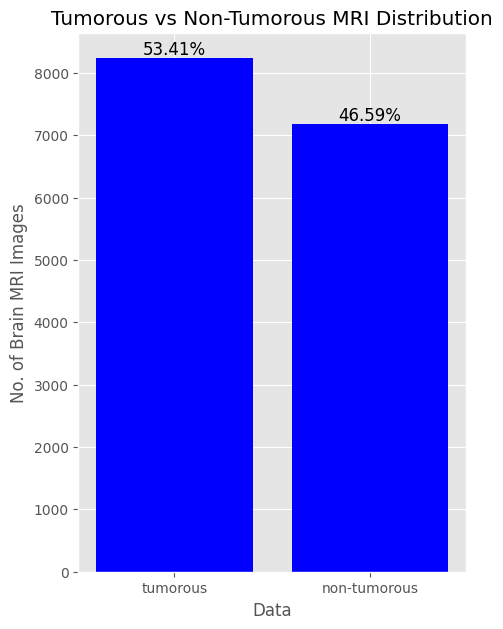

In [29]:
data = {"tumorous": count_tumor, "non-tumorous": count_notumor}
typex = list(data.keys())
values = list(data.values())

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

fig = plt.figure(figsize=(5,7))
bars = plt.bar(typex, values, color="blue")

# Add percentage text above bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%', ha='center', va='bottom', fontsize=12, color="black")

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Tumorous vs Non-Tumorous MRI Distribution")
plt.show()
